In [56]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler # todos los valores se dividen por la media y se resta la dviacion estandar
from sklearn.datasets import load_iris

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [29]:
# Import Data Frame
X, _ = make_blobs(n_samples= 300, centers= 3, random_state= 2024)
df_raw = pd.DataFrame(X, columns= ['x', 'y'])
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [30]:
# EDA
df = df_raw.copy()

display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
x,300.0,-3.463733,3.842370,-9.657696,-6.402874,-5.367757,1.060328,3.575209
y,300.0,-4.341295,6.108935,-12.454461,-9.120832,-7.524914,3.539383,6.681679


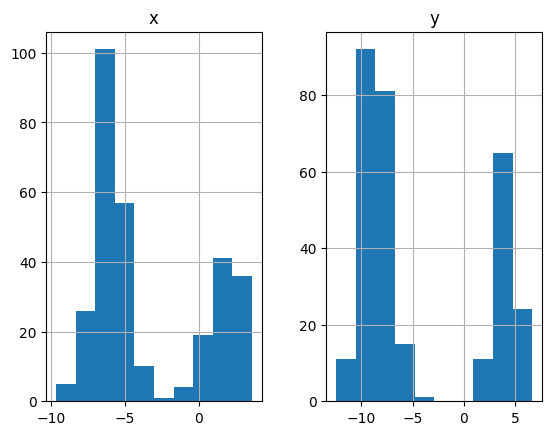

In [31]:
df.hist()
plt.show()

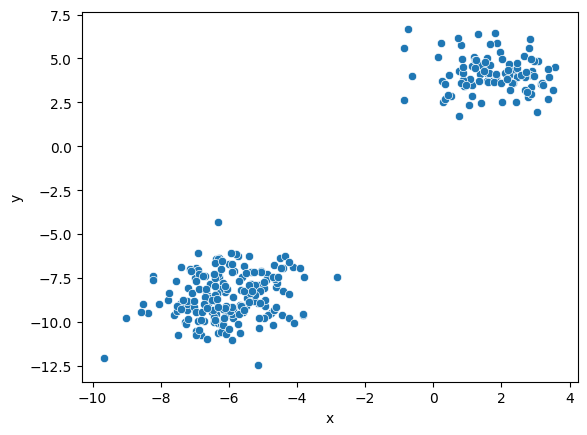

In [32]:
sns.scatterplot(data= df, x= 'x', y= 'y')
plt.show()

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[-0.90897378, -0.42813105],
       [ 1.26384366,  1.38917041],
       [-0.30362524, -0.60421383],
       [ 1.20027255,  1.28204937],
       [-0.42914431, -0.58324088],
       [-0.64793586, -0.80794932],
       [ 1.18327882,  1.34418286],
       [-1.04682949, -1.04921327],
       [ 1.37562047,  1.76812319],
       [-0.59076986, -0.31057767],
       [-0.83478218, -0.63777185],
       [-0.73339313, -0.50810307],
       [-0.55588361, -0.83782539],
       [-1.19523997, -0.7655939 ],
       [ 1.42993717,  1.12114908],
       [ 1.72667551,  1.29141987],
       [-0.24582149, -0.64331786],
       [-0.71376044, -1.00523049],
       [-0.76536807, -0.81469002],
       [ 1.82174491,  1.23887884],
       [-0.85465568, -0.92457984],
       [ 0.97065329,  1.31922841],
       [-0.65581747, -0.86862245],
       [-0.57944433, -0.77214005],
       [ 1.4161385 ,  1.59576965],
       [-0.62894314, -0.89331498],
       [-0.62433811, -0.45541574],
       [-1.07878155, -0.86286611],
       [ 1.51571522,

In [42]:
df_scaled = pd.DataFrame(X_scaled, columns= ['x_scal', 'y_scal'])
display(df_scaled.describe().T)

,count,mean,std,min,25%,50%,75%,max
x_scal,300.0,-8.289665e-17,1.001671,-1.614710,-0.766207,-0.496362,1.179381,1.834988
y_scal,300.0,-4.144833e-17,1.001671,-1.330301,-0.783692,-0.522012,1.292180,1.807417


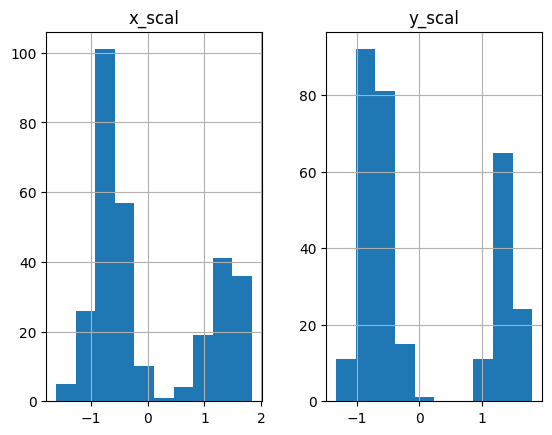

In [44]:
df_scaled.hist()
plt.show()

In [45]:
X = df_scaled
model = KMeans(n_clusters= 4, random_state= 2024)
model.fit(X)

KMeans(n_clusters=4, random_state=2024)

In [46]:
cluster = model.predict(X)
cluster

array([2, 1, 0, 1, 0, 3, 1, 3, 1, 2, 2, 2, 0, 3, 1, 1, 0, 3, 3, 1, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 1, 1, 1, 3, 3, 1, 3, 3, 1, 2, 0, 0, 1, 2,
       0, 3, 1, 3, 1, 3, 2, 2, 3, 3, 3, 2, 1, 2, 3, 0, 2, 0, 3, 3, 1, 3,
       2, 1, 3, 0, 1, 1, 3, 2, 0, 1, 3, 0, 1, 2, 2, 3, 2, 0, 0, 3, 1, 3,
       3, 3, 3, 3, 3, 0, 1, 3, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 3, 0, 1,
       1, 3, 2, 0, 0, 1, 1, 3, 0, 0, 1, 3, 2, 1, 3, 0, 2, 0, 2, 0, 3, 3,
       0, 1, 0, 1, 0, 1, 0, 3, 1, 2, 0, 0, 0, 2, 0, 1, 0, 3, 1, 1, 1, 1,
       1, 3, 0, 3, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 3, 2, 1, 2, 0, 2, 0, 0,
       2, 1, 3, 2, 3, 2, 1, 1, 2, 2, 3, 1, 0, 0, 3, 1, 0, 2, 0, 0, 3, 2,
       1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 3, 1, 1, 3, 0, 2, 1, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 3, 3, 2, 1, 0,
       0, 3, 2, 3, 0, 3, 1, 1, 2, 1, 2, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 0,
       1, 1, 1, 0, 1, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1,
       3, 2, 3, 3, 0, 0, 3, 2, 1, 1, 3, 1, 2, 3], d

In [51]:
df_final = df_scaled.copy()
df_final['cluster'] = cluster
df_final

,x_scal,y_scal,cluster
0,-0.908974,-0.428131,2
1,1.263844,1.389170,1
2,-0.303625,-0.604214,0
3,1.200273,1.282049,1
4,-0.429144,-0.583241,0
...,...,...,...
295,1.384592,1.381815,1
296,-0.745775,-0.791599,3
297,1.674394,1.367730,1
298,-0.769322,-0.592323,2


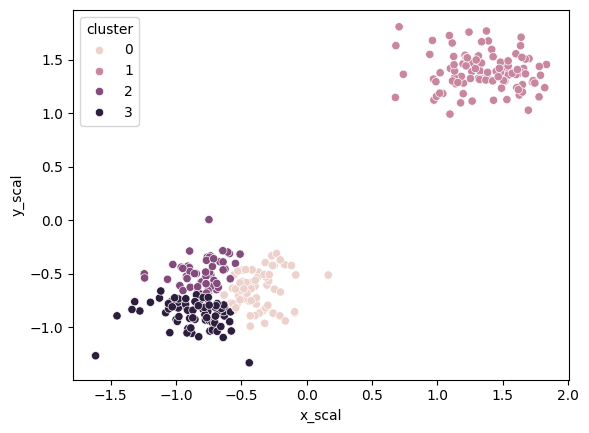

In [53]:
sns.scatterplot(data= df_final, x= 'x_scal', y= 'y_scal', hue= 'cluster')
plt.show()

### **2. df = load_iris**

In [61]:
X, _ = load_iris(return_X_y=True, as_frame=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
X.columns = X.columns.str.replace(' ','_').str.replace(r"\W",'', regex=True)
X

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


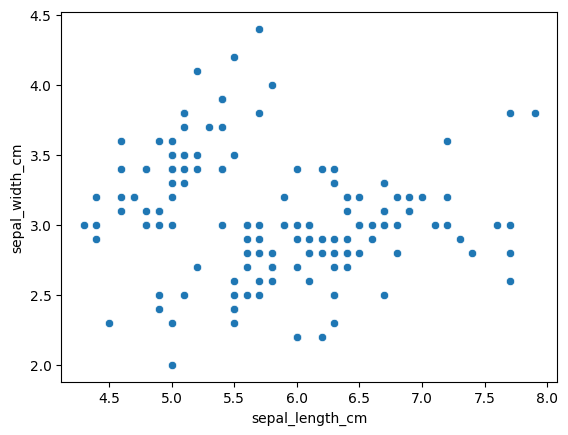

In [64]:
sns.scatterplot(data=X, x='sepal_length_cm', y='sepal_width_cm')
plt.show()

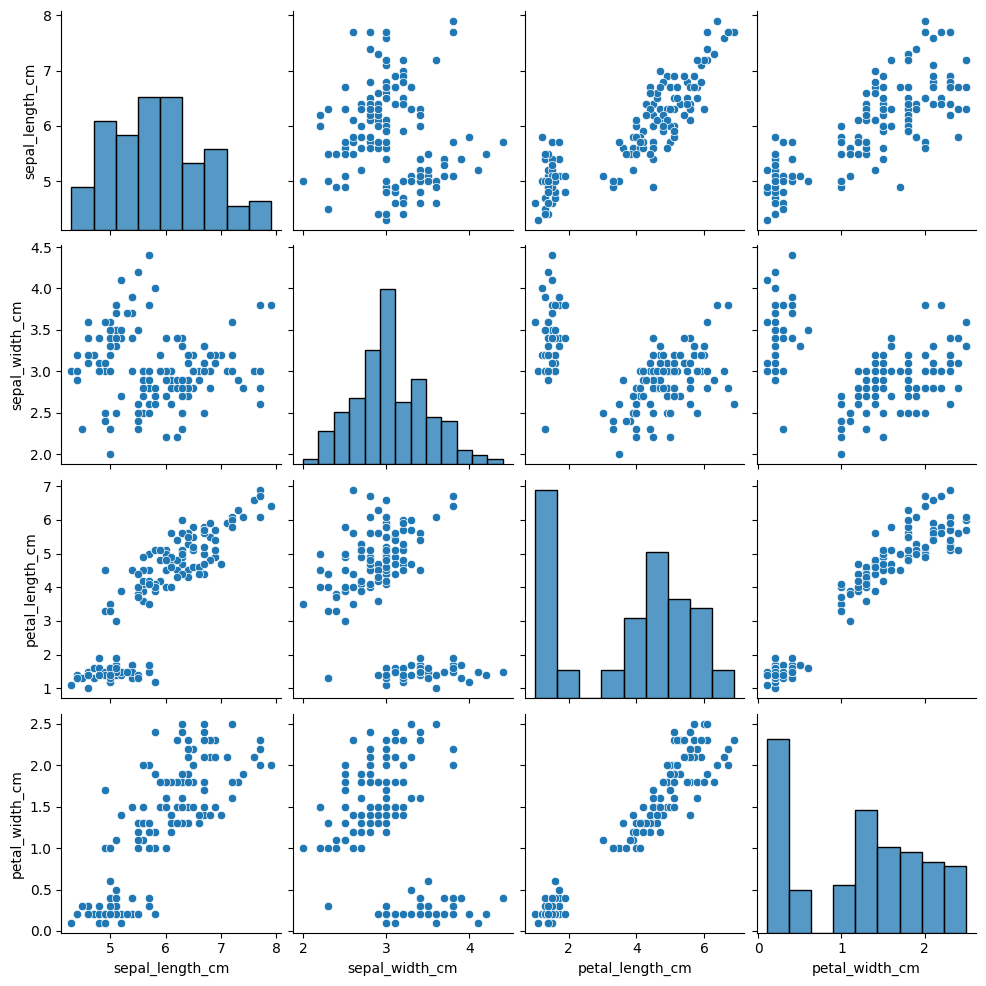

In [65]:
sns.pairplot(data=X)
plt.show()

In [66]:
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scal, columns=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'])

In [67]:
display(df_scaled.describe().T)
# Verify scal

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,150.0,-4.736952e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepal_width_cm,150.0,-7.815970e-16,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
petal_length_cm,150.0,-4.263256e-16,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
petal_width_cm,150.0,-4.736952e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096


In [68]:
Z = linkage(df_scaled, method='complete')

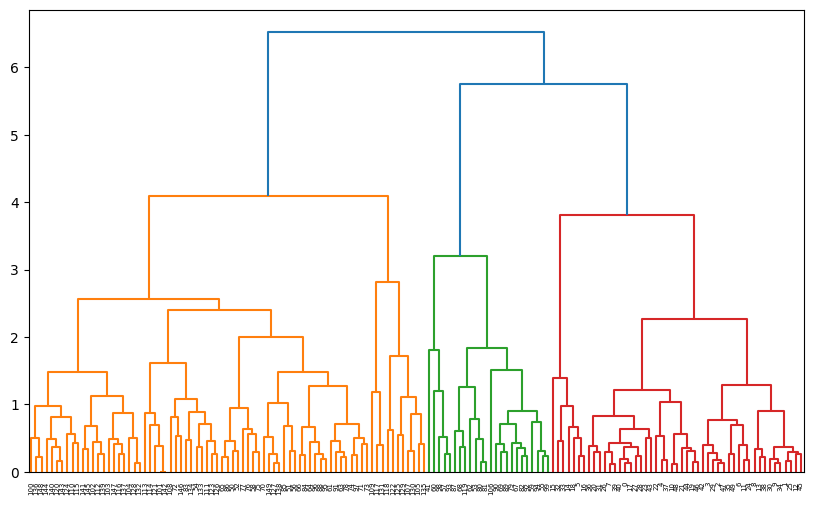

In [71]:
plt.figure(figsize= (10,6))
dendrogram(Z)
plt.show()

In [72]:
X.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.117570,0.871754,0.817941
sepal_width_cm,-0.117570,1.000000,-0.428440,-0.366126
petal_length_cm,0.871754,-0.428440,1.000000,0.962865
petal_width_cm,0.817941,-0.366126,0.962865,1.000000


In [78]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_pca

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
         2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
         9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
         1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
        -7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
        -6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
        -2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
        -4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
        -4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
        -2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
        -5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
        -1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

In [79]:
df_pca = pd.DataFrame(data=X_pca,  columns=['pc1', 'pc2', 'pc3', 'pc4'])
df_pca

,pc1,pc2,pc3,pc4
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


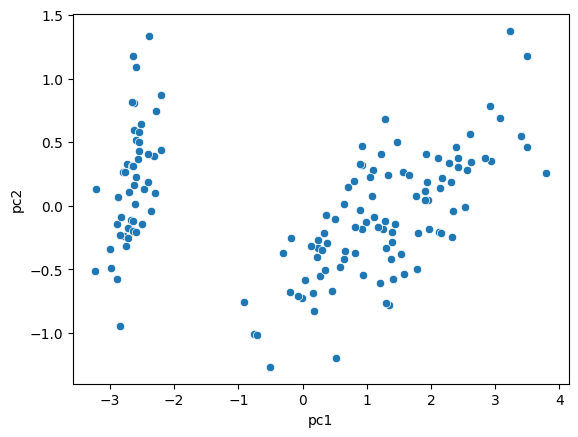

In [83]:
sns.scatterplot(data=df_pca, x='pc1', y='pc2')
plt.show()

In [81]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

La regla es: quedece con la mayor catidad de variables que sume masde 0.9

In [84]:
df_pca.corr()

,pc1,pc2,pc3,pc4
pc1,1.000000e+00,5.027752e-15,9.717970e-17,7.930338e-15
pc2,5.027752e-15,1.000000e+00,-3.028956e-14,1.513194e-14
pc3,9.717970e-17,-3.028956e-14,1.000000e+00,-1.777760e-13
pc4,7.930338e-15,1.513194e-14,-1.777760e-13,1.000000e+00


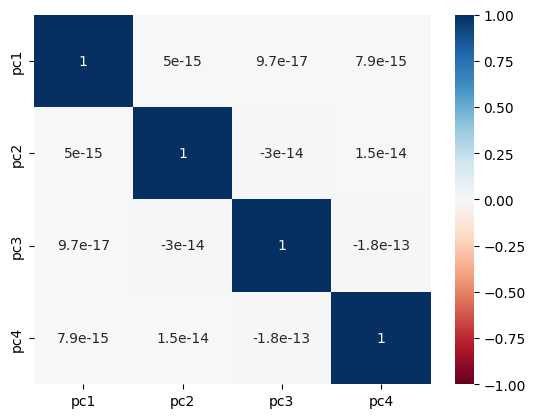

In [86]:
sns.heatmap(data=df_pca.corr(), vmin=-1, vmax=1, annot=True,  cmap='RdBu')
plt.show()